# iNaturalist City Nature Challenge: Dynamics in a citizen science community

### Research Questions

**RQ1:** Can we identify macroscopic laws of citizen science projects? The main goal of the project to identify short-term and long-term dynamics in citizen science projects. (general RQ)

**RQ2:** How citizen science communities are growing in time, what drives their growth if not preferential attachment or exogenous factors?

**RQ3:** If we are looking at City Nature Challenge data - we have now data for San Francisco, LA, and London, which now have 4 or 3 years time series. How the power law like distributions of human activities are emerging? It's interesting that it is similar for SF and LA and the pattern that they have in year 4, London has in year 3.

**RQ4:** (a) Are there differences in data collection patterns in each year and between years? Are there also emerging pattern over time in a location? (b) Are there also emerging pattern over time in a location?

**RQ5:** To what degree the heavy contributors influence the total pattern and distribution of data? Is there any observed impact from major contributors (e.g. someone who is heavy contributors dropping off because they can't keep up with the competition). There is also the question about repeat recruitment - are the pattern of one timers vs people who come back stay the same from year to year? Are there any patterns or places that are behaving differently in terms of patterns of contribution?

**RQ6:** Since there are specific patterns of participation for different people from various countries we would like to understand the reason of power-law of participation (some participate a lot, many participate only little). We would like to understand how this pattern emerge dynamically (M.Pocco).

**RQ7:** What is the dfference between citizen science projects evolution in different cities around the globe? London vs. San Francisco? What are parameters which may lead to differences?

Some of the problems for citizen science community are: heterogeneity of collected data, missing data, non-controlled growth of community of observers.

## 1) Getting started: Importing and exploring exemplary data

In [84]:
import pandas as pd

# force pandas to display all columns on screen
pd.set_option('display.max_columns', None)

# load data of one CNC as an example
df_cnc_ln_18 = pd.read_csv('Data/CNC London 2018.csv')

# print dimensions (rows, columns)
print(df_cnc_ln_18.shape)

# list column names
print(df_cnc_ln_18.columns)
    
# print first 5 rows
df_cnc_ln_18.head()

(2624, 34)
Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id'],
      dtype='object')


,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,url,image_url,sound_url,tag_list,description,num_identification_agreements,num_identification_disagreements,captive_cultivated,oauth_application_id,place_guess,latitude,longitude,positional_accuracy,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,research,CC-BY,https://www.inaturalist.org/observations/11479007,https://static.inaturalist.org/photos/16383446...,NaN,NaN,NaN,4,0,False,2.0,"6-7 Griffin Cl, London, UK",51.550636,-0.228487,NaN,NaN,NaN,False,gps,gps,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,CC0,https://www.inaturalist.org/observations/11480212,https://static.inaturalist.org/photos/16385366...,NaN,NaN,NaN,4,0,False,2.0,"19 Exhibition Rd, Kensington, London SW7 2HE, UK",51.495277,-0.173611,NaN,NaN,open,False,gps,gps,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,casual,NaN,https://www.inaturalist.org/observations/11480902,https://static.inaturalist.org/photos/16386511...,NaN,NaN,NaN,0,0,True,3.0,"58 Shuttleworth Road, London, England, GB",51.472981,-0.169102,36848.0,NaN,NaN,False,NaN,NaN,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/11481097,https://static.inaturalist.org/photos/16386823...,NaN,NaN,NaN,2,0,False,3.0,"Hyde Park, London, England, GB",51.508076,-0.161516,10.0,NaN,NaN,False,NaN,NaN,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,CC0,https://www.inaturalist.org/observations/11482247,https://static.inaturalist.org/photos/16388939...,NaN,NaN,NaN,2,0,False,2.0,"19 Exhibition Rd, Kensington, London SW7 2HE, UK",51.496113,-0.173889,NaN,NaN,NaN,False,gps,gps,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0


In [85]:
# count users and how many observations each of them uploaded

no_users = df_cnc_ln_18["user_login"].nunique()
print(no_users)
df_obs_count = df_cnc_ln_18.groupby("user_login")["id"].nunique().sort_values(ascending=False).reset_index(name='observation_count')
pd.set_option('display.max_rows', None)
print(df_obs_count)

109
                         user_login  observation_count
0               wildhamandpetersham                567
1                   lucyrobinsonnhm                150
2                      fisherlady21                125
3                          vshennan                 97
4                              focg                 95
5                            jbeale                 88
6                      fieldmarshal                 85
7                         msutton92                 75
8                             jenra                 67
9                            ben217                 66
10                      danielcahen                 64
11                  victoriajburton                 58
12                      biologykate                 51
13                        stephwest                 49
14                            kc719                 47
15                            luc21                 43
16                         wildhope                 38
17    

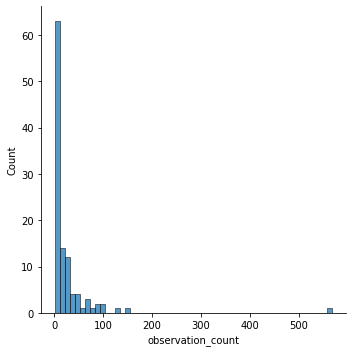

In [86]:
import seaborn as sns
# histogram
sns.displot(df_obs_count, x="observation_count")

[Text(0.5, 1.0, 'Number of observations per user')]

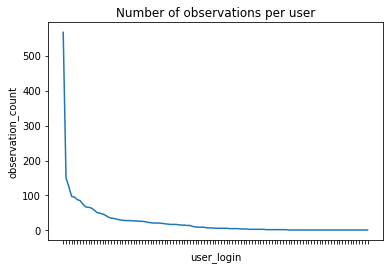

In [87]:
# lineplot
lineplt = sns.lineplot(data=df_obs_count, x="user_login", y="observation_count")

lineplt.set(xticklabels=[])  
lineplt.set(title='Number of observations per user')
# lineplt.tick_params(bottom=False)  # remove the ticks
